In [36]:
#importing alll the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# 1. DATA PREPARATION STAGE

In [2]:
#FUNCTION TO LOAD CSV FILE AND RETURN DATA AS A DATAFRAME
def load_data(filename):
    data = pd.read_csv(filename)
    return data

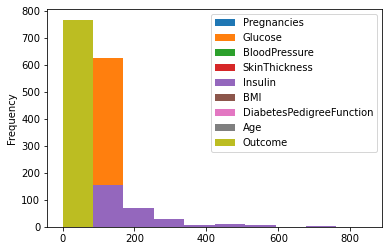

In [3]:
#LOADING THE DATA
data= load_data("diabetes.csv")

#visualize the data
data.plot.hist();

In [4]:
#CHARACTERISTICS OF THE DATA
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# EXTRACTING FEATURES NAME AND SHAPE OF THE DATAFRAME
features = data.keys().to_list()
r,c = data.shape

print(f"The shape of the dataset is {r,c} and the features are {features}")

The shape of the dataset is (768, 9) and the features are ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [6]:
# SCALE THE OUTCOME TO {-1,+1} AND STANDARDIZE THE REMAINING FEATURES
#SPLITING THE DATASET INTO TRAINING AND TESTING DATA
def split_and_standardise_data(data,features,ratio = 0.8):
    
    #STANDARDIZE THE FEATURES EXCEPT THE OUTCOME
    for i in features[:-1]:
        std =data[i].std()
        mean = data[i].mean()
        ma = data[i].max()
        data[i]=(data[i]-mean)/std
        
    #SCALE THE OUTCOME TO {-1,+1}
    data.loc[(data[features[-1]] ==0)] = -1
    r,c = data.shape
    ratio = math.floor(r*ratio)
    training_data = data.iloc[:ratio].to_numpy()
    testing_data = data.iloc[ratio:].to_numpy()
    return training_data,testing_data


In [37]:
# SIGN FUNCTION : ACTIVATION FUNCTION TO PREDICT THE OUTCOME
def sign(x):
    return 1 if x>0 else -1


# 2. TRAINING AND TESTING THE MODEL

In [8]:
# #experiment with bastch size
# def sign1(x):
#     l=list()
#     for index,i in enumerate(x):
#         print(i)
#         if i>0:
#             l.append(1)
#         else:
#             l.append(-1)
#     return np.asarray(l)
# #training the model

# def train_model(t_data,learning_rate=0.001,bias =0):
#     wt_crit = np.random.RandomState(seed=123)
#     wt = wt_crit.uniform(low=0.0, high=1.0, size=(1, 8)).T
#     batch_size =11
# #     print(f"wt={wt}")
#     iteri,c =t_data.shape 
#     for i in range(0,iteri-batch_size-1,batch_size):
#         di= np.array(t_data[i:i+batch_size,:8])
#         print(di.shape,wt.shape)
#         score = np.matmul(di,wt)+bias
#         pred = sign1(score)
#         exp = t_data[i:i+batch_size,8]
#         print(exp.shape,pred)
#         wt = wt+ np.sum(np.matmul(di,(exp-pred).T))*learning_rate
#         bias = bias + np.sum(exp-pred)*learning_rate
#     return wt.T,bias

In [9]:
# TRAINING THE MODEL: WEIGHT AND BIAS
def train_model(t_data,learning_rate=0.001,bias =0):
    wt_crit = np.random.RandomState(seed=123)
    wt = wt_crit.uniform(low=0.0, high=1.0, size=(1, 8))
#     print(f"wt={wt}")
    iteri,c =t_data.shape 
    pred_l=[]
    for i in range(iteri):
        di= np.array(t_data[i,:8])
        score = np.matmul(wt,di)+bias
#         sigmoid = lambda x : 1 if (x >0) else 0
        pred = sign(score)
        pred_l.append(pred)
        exp = t_data[i,8]
        wt = wt+ (exp-pred)*di*learning_rate
        bias = bias + (exp-pred)*learning_rate
    return wt,bias

In [10]:
# TESTING THE ACCURACY OF THE ACQUIRED FUNCTION
def test_model(t_data,wt,bias):
    iteri,c =t_data.shape 
    
    acc=0
    for i in range(iteri):
        datai= np.array(t_data[i,:8])
        score= np.matmul(wt,datai)+bias
#         sigmoid = lambda x : 1 if (x >0) else 0
        pred = sign(score)
        exp = t_data[i,8]
#         print(pred,exp,pred==exp)
        if pred==exp:
            acc+=1
    return round(100*acc/iteri,5)

In [11]:
# PREDICT THE OUTCOME BASED ON THE INPUT FEATURES
def predict(data,wt,bias):
    datai= np.array(data[i,:8])
    summation = np.matmul(wt,datai)+bias
#     sigmoid = lambda x : 1 if (x >0) else 0
    pred = sign(summation)
    return pred

In [12]:
# LIST OF LEASRNING_RATE FOR COMPARING THE ACCURACY
learning_rate_list=[0.0001,0.001,0.01,0.1]

# EXPERIMENT 1
### DATA RATIO = 8:2 :: Training data: Testing data

In [13]:
#LIST TO HOLD THE ACCURACY FOR THE CORRESPONDING LEARNING_RATE FOR EXPERIMENT 1
accuracy_list_exp1=[]

# TRAINING AND TESTING DATA DIVIDED IN THE RATIO OF 8:2
training_data_exp1, testing_data_exp1 = split_and_standardise_data(data,features,ratio=0.8)
print(f"Size of training data{training_data_exp1.shape} and testing data {testing_data_exp1.shape}\n")

#training the model
for l_r in learning_rate_list:
    wt,bias = train_model(training_data_exp1,learning_rate=l_r)
    print(f"weight={wt}\nbias={bias}")
    #testing the model for accuracy
    accuracy_list_exp1.append(test_model(testing_data_exp1,wt,bias))
    print(f"Accuracy with the learning rate {l_r} is {accuracy_list_exp1[-1]}\n")
    

Size of training data(614, 9) and testing data (154, 9)

weight=[[0.69408588 0.29030154 0.21992451 0.54214298 0.71233981 0.4261485
  0.97565788 0.68311443]]
bias=0.01400000000000001
Accuracy with the learning rate 0.0001 is 89.61039

weight=[[0.67263614 0.32776138 0.15758203 0.45959685 0.64817739 0.45352683
  0.92970105 0.66767668]]
bias=0.1400000000000001
Accuracy with the learning rate 0.001 is 90.90909

weight=[[ 0.47895153  0.26006966 -0.13203228  0.12379453  0.31271832  0.40358453
   0.685714    0.51327478]]
bias=0.8200000000000004
Accuracy with the learning rate 0.01 is 97.4026

weight=[[ 0.51360102  0.15494774 -0.17301697 -0.01804013  0.14893899  0.85329505
   0.29477787  0.43570841]]
bias=1.7999999999999998
Accuracy with the learning rate 0.1 is 99.35065



# EXPERIMENT 2
### DATA RATIO = 7:3 :: Training data: Testing data

In [20]:
#LIST TO HOLD THE ACCURACY FOR THE CORRESPONDING LEARNING_RATE FOR EXPERIMENT 2
accuracy_list_exp2=[]

# TRAINING AND TESTING DATA DIVIDED IN THE RATIO OF 8:2
training_data_exp2, testing_data_exp2 = split_and_standardise_data(data,features,ratio=0.7)
print(f"Size of training data{training_data_exp2.shape} and testing data {testing_data_exp2.shape}\n")

#training the model
for l_r in learning_rate_list:
    wt,bias = train_model(training_data_exp2,learning_rate=l_r)
    print(f"weight={wt}\nbias={bias}")
    #testing the model for accuracy
    accuracy_list_exp2.append(test_model(testing_data_exp2,wt,bias))
    print(f"Accuracy with the learning rate {l_r} is {accuracy_list_exp2[-1]}\n")

Size of training data(537, 9) and testing data (231, 9)

weight=[[0.69626903 0.28715539 0.22422341 0.55035367 0.7193317  0.42420115
  0.98076105 0.6846163 ]]
bias=0.0012000000000000001
Accuracy with the learning rate 0.0001 is 98.7013

weight=[[0.69446767 0.29629986 0.20057098 0.5417038  0.71809627 0.43405339
  0.98073275 0.68269539]]
bias=0.012
Accuracy with the learning rate 0.001 is 98.7013

weight=[[0.67655225 0.3502525  0.10520867 0.48724164 0.71031767 0.47545741
  0.98454413 0.66721877]]
bias=0.08
Accuracy with the learning rate 0.01 is 98.7013

weight=[[ 0.43254685  0.47561486 -0.2454015   0.23094913  0.67371247  1.02965272
   0.96770206  0.58662889]]
bias=0.4
Accuracy with the learning rate 0.1 is 99.5671



# USING THE SKLEARN TO FIND A GENERAL FUNCTION BASED ON THE SAME DATASET TO COMPARE THE ACCURACY WITH OUR MODEL


In [28]:
# using sklearn perception method implementation to compare our result
from sklearn.linear_model import Perceptron

# LIST TO HOLD THE ACCURACY OF THE SKLEARN FOR DIFFERENT LEARNING_RATE
accuracy_list_sklearn_exp1=[]
for l_r in learning_rate_list:
    clf = Perceptron(tol=l_r, random_state=0)
    clf.fit(training_data_exp1[:,:8], training_data_exp1[:,8])
    Perceptron()
    accuracy_list_sklearn_exp1.append(clf.score(testing_data_exp1[:,:8], testing_data_exp1[:,8])*100)

# LIST TO HOLD THE ACCURACY OF THE SKLEARN FOR DIFFERENT LEARNING_RATE
accuracy_list_sklearn_exp2=[]
for l_r in learning_rate_list:
    clf = Perceptron(tol=l_r, random_state=0)
    clf.fit(training_data_exp2[:,:8], training_data_exp2[:,8])
    Perceptron()
    accuracy_list_sklearn_exp2.append(clf.score(testing_data_exp2[:,:8], testing_data_exp2[:,8])*100)

  # VISUALIZATION OF THE ACCURACY OF THE EXPERIMENT 1 AND 2 
  # FOR DIFFERENT LEARNING_RATE

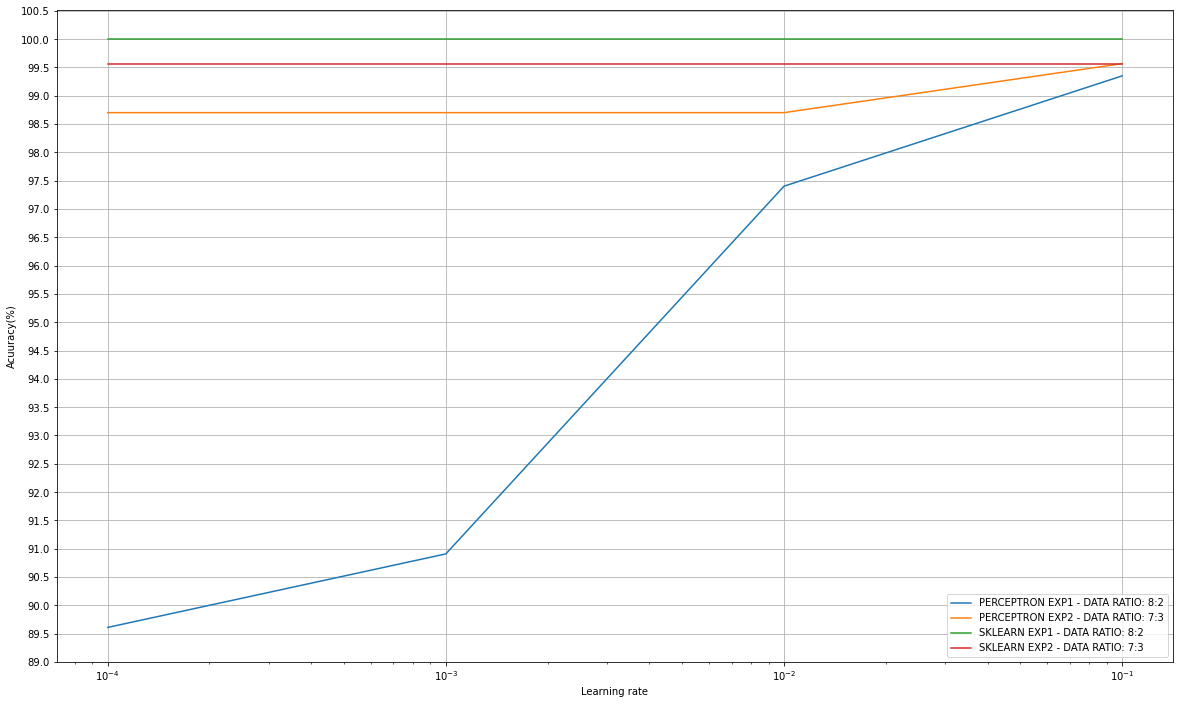

In [35]:
fig, ax = plt.subplots()

# FIGURE SIZE FOR THE PLOT
plt.rcParams["figure.figsize"] = (20,12)

# PLOTTING THE ACCURACY FOR THE CORRESPONDING LEARNING RATE FOR OUR MODEL EXPERIMENT 1 AND 2 
ax.semilogx(learning_rate_list, accuracy_list_exp1, label = "PERCEPTRON EXP1 - DATA RATIO: 8:2")
ax.semilogx(learning_rate_list, accuracy_list_exp2, label = "PERCEPTRON EXP2 - DATA RATIO: 7:3")

# PLOTTING THE ACCURACY FOR THE CORRESPONDING LEARNING RATE FOR SKLEARN EXPERIMENT 1 AND 2 
ax.semilogx(learning_rate_list, accuracy_list_sklearn_exp1, label = "SKLEARN EXP1 - DATA RATIO: 8:2")
ax.semilogx(learning_rate_list, accuracy_list_sklearn_exp2, label = "SKLEARN EXP2 - DATA RATIO: 7:3")
#plt.figure(figsize=(8, 6), dpi=80)
ax.grid()

#plt.xticks(np.arange(0.0001, 0.1, 0.005))
plt.yticks(np.arange(89, 101, 0.5))
plt.xlabel("Learning rate")
plt.ylabel("Acuuracy(%)")
plt.legend()
plt.show()